In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn import linear_model
import statsmodels.api as sm

# Exercises in linear regression

## Exercise 1

Load in the "EnergyEfficiency.csv" data (on Moodle). It is data about energy efficiency of buildings, more specifically it is about predicting the heating load and cooling load of building based on a set of features about the buildings. It is retrieved from UCI Machine Learning Repository: [Energy efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency).

Answer the following questions:
1. Do a visualization of the relationship/correlation between the variables `SurfaceArea` and `HeatingLoad`.
2. Is there a correlation between `SurfaceArea` and `HeatingLoad`? If so, what is the strength of it and is it statistically significant?
3. Does the correlation make sense to you? What if you add `hue = "OverallHeight"` to your scatterplot?
4. Train a simple linear regression model with `SurfaceArea` as independent variable (x) and `HeatingLoad` as dependent variable (y).
5. What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?
6. Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.
7. Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

## Exercise 2

In this exercise, we will continue from Exercise 1 and keep using the "EnergyEfficiency.csv" data (on Moodle).

Answer the following questions:
1. Train a multiple linear regression model for `HeatingLoad` using at least two other variables from the dataset as feature variables.
2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?
3. Check each of the assumptions/problems for linear regression.

## Exercise 3

In this exercise, we will use the Ames dataset from the multiple linear regression notebook.

Answer the following questions:
1. Can you train a linear regression model to achieve a lower RMSE than the models we saw in the multiple linear regression notebook?
2. Can you train a linear regression model to achieve a higher R-squared than the final model in the multiple linear regression notebook?
3. Do your models satisfy the assumptions of linear regression?

In [43]:
df = pd.read_csv("../Notebooks and data-5/EnergyEfficiency.csv")

In [44]:
df

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [4]:
df.describe()

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RelativeCompactness      768 non-null    float64
 1   SurfaceArea              768 non-null    float64
 2   WallArea                 768 non-null    float64
 3   RoofArea                 768 non-null    float64
 4   OverallHeight            768 non-null    float64
 5   Orientation              768 non-null    int64  
 6   GlazingArea              768 non-null    float64
 7   GlazingAreaDistribution  768 non-null    int64  
 8   HeatingLoad              768 non-null    float64
 9   CoolingLoad              768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [6]:
df.isna().sum()

RelativeCompactness        0
SurfaceArea                0
WallArea                   0
RoofArea                   0
OverallHeight              0
Orientation                0
GlazingArea                0
GlazingAreaDistribution    0
HeatingLoad                0
CoolingLoad                0
dtype: int64

In [7]:
df.duplicated().sum()

0

### 1. Do a visualization of the relationship/correlation between the variables SurfaceArea and HeatingLoad.

<Axes: xlabel='SurfaceArea', ylabel='HeatingLoad'>

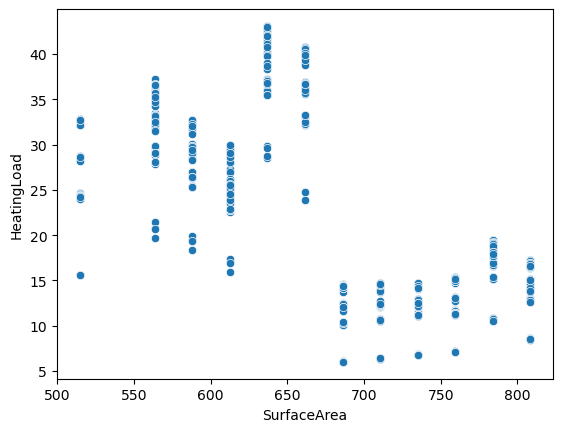

In [10]:
sns.scatterplot(data=df, x="SurfaceArea", y="HeatingLoad")

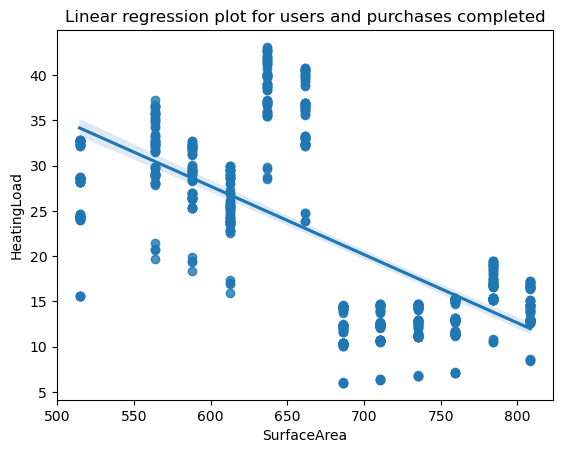

In [11]:
sns.regplot(data=df, x="SurfaceArea", y="HeatingLoad")
plt.title("Linear regression plot for SurfaceArea and HeatingLoad")
plt.show()

### 2. Is there a correlation between SurfaceArea and HeatingLoad? If so, what is the strength of it and is it statistically significant?

    There seems to be one, but it is hard to say for sure

In [42]:
df

,PredictMethod,ManuallyCalculated
0,34.158690,71.773112
1,34.158690,71.773112
2,34.158690,71.773112
3,34.158690,71.773112
4,30.464719,71.374314
...,...,...
763,13.841851,71.597460
764,11.994866,71.698479
765,11.994866,71.706018
766,11.994866,71.703002


In [45]:
X = df["SurfaceArea"]

In [41]:
X

,const,SurfaceArea
0,1.0,514.5
1,1.0,514.5
2,1.0,514.5
3,1.0,514.5
4,1.0,563.5
...,...,...
763,1.0,784.0
764,1.0,808.5
765,1.0,808.5
766,1.0,808.5


In [16]:
X = sm.add_constant(X)

In [17]:
X

,const,SurfaceArea
0,1.0,514.5
1,1.0,514.5
2,1.0,514.5
3,1.0,514.5
4,1.0,563.5
...,...,...
763,1.0,784.0
764,1.0,808.5
765,1.0,808.5
766,1.0,808.5


In [18]:
y = df["HeatingLoad"]

In [19]:
linreg_model = sm.OLS(y, X).fit()

In [20]:
linreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeatingLoad   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     585.3
Date:                Wed, 12 Feb 2025   Prob (F-statistic):           1.69e-96
Time:                        09:46:35   Log-Likelihood:                -2646.6
No. Observations:                 768   AIC:                             5297.
Df Residuals:                     766   BIC:                             5306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          72.9454      2.111     34.554      0.000      68.801      77.090
SurfaceArea    -0.0754      0.003    -24.192      0.000      -0.082      -0.069
==============================================================================
Omnibus:                       37.973   Durbin-Watson:                   0.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.851
Skew:                           0.576   Prob(JB):                     4.95e-10
Kurtosis:                       2.890   Cond. No.                     5.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpretation of the model**

Here we see general information about the model at the top, such as R-squared (0.433) and  Adjusted R-squared (0.432)
The coef for SurfaceArea is -0.0754 for the slope indicating it is negative and not to step.
The pvalue is aproximately 0 meaning that the hypothesis can be rejected and that there is a correlation


### 3. Does the correlation make sense to you? What if you add hue = "OverallHeight" to your scatterplot?

<Axes: xlabel='SurfaceArea', ylabel='HeatingLoad'>

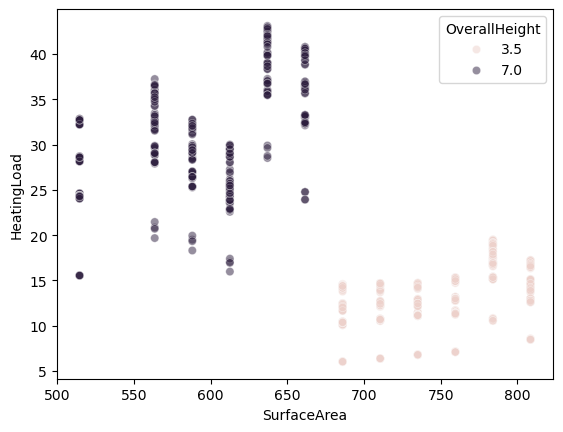

In [25]:
sns.scatterplot(data=df, x="SurfaceArea", y="HeatingLoad", hue="OverallHeight", alpha=0.5)

    Given this information it doesn't make sense as there seems to be to different clusters of data. Not sure what to make of it

### 4. Train a simple linear regression model with SurfaceArea as independent variable (x) and HeatingLoad as dependent variable (y).

### 5. What does the model say about the change HeatingLoad when the SurfaceArea goes up by 1 unit?

    When going one unit up on the SurfaceArea(x) axes, the correlated HeatingLoad(y) axis change is -0.0754

### 6. Add the linear regression line to a scatterplot of SurfaceArea and HeatingLoad

In [46]:
pred_y = linreg_model.params["const"] + linreg_model.params["SurfaceArea"]*df["SurfaceArea"]

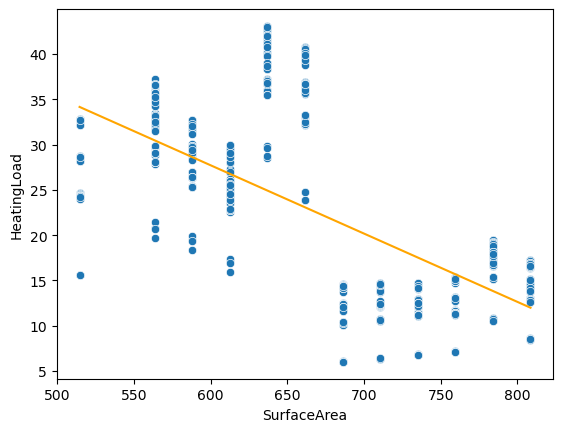

In [47]:
sns.scatterplot(data = df, x = "SurfaceArea", y = "HeatingLoad")
plt.plot(df["SurfaceArea"], pred_y, color = "orange")
plt.show()

### 7. Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

In [59]:
#linreg_model.summary()

In [58]:
# R-squared, with the value 0.433 it tells that it might not be a good fit given it is numerical data of houses, closer to 1 the better
linreg_model.rsquared

0.43312223289382823

In [50]:
linreg_model.rsquared_adj # Adj. R-squared

0.4323821835895121

In [51]:
linreg_model.resid

0     -18.608690
1     -18.608690
2     -18.608690
3     -18.608690
4      -9.624719
         ...    
763     4.038149
764     4.545134
765     4.445134
766     4.485134
767     4.645134
Length: 768, dtype: float64

In [52]:
np.mean(np.abs(linreg_model.resid))

6.002338517195693

In [53]:
np.mean(linreg_model.resid**2)

57.63983779426343

In [54]:
np.sqrt(np.mean(linreg_model.resid**2)) # RMSE

7.592090475900786

## Exercise 2

### 1. Train a multiple linear regression model for HeatingLoad using at least two other variables from the dataset as feature variables.

In [66]:
X_df = df[["SurfaceArea", "RelativeCompactness", "GlazingArea"]]
X_df

,SurfaceArea,RelativeCompactness,GlazingArea
0,514.5,0.98,0.0
1,514.5,0.98,0.0
2,514.5,0.98,0.0
3,514.5,0.98,0.0
4,563.5,0.90,0.0
...,...,...,...
763,784.0,0.64,0.4
764,808.5,0.62,0.4
765,808.5,0.62,0.4
766,808.5,0.62,0.4


In [67]:
y_df = df["HeatingLoad"]
y_df

0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: HeatingLoad, Length: 768, dtype: float64

In [68]:
X_df_wInt = sm.add_constant(X_df)

In [70]:
mulinreg_model = sm.OLS(y, X_df_wInt).fit()

In [71]:
mulinreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeatingLoad   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     329.0
Date:                Wed, 12 Feb 2025   Prob (F-statistic):          4.25e-137
Time:                        11:49:32   Log-Likelihood:                -2546.1
No. Observations:                 768   AIC:                             5100.
Df Residuals:                     764   BIC:                             5119.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 350.4465     28.140     12.454      0.000     295.205     405.688
SurfaceArea            -0.2903      0.022    -13.471      0.000      -0.333      -0.248
RelativeCompactness  -180.4643     17.949    -10.055      0.000    -215.699    -145.230
GlazingArea            20.4379      1.810     11.291      0.000      16.885      23.991
==============================================================================
Omnibus:                      117.214   Durbin-Watson:                   0.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.508
Skew:                           0.112   Prob(JB):                     3.91e-07
Kurtosis:                       2.066   Cond. No.                     9.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
mulinreg_model.params

const                  350.446471
SurfaceArea             -0.290341
RelativeCompactness   -180.464308
GlazingArea             20.437899
dtype: float64

### 2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?

In [77]:
print("linear R-squared:       ", linreg_model.rsquared)
print("multi linear R-squared: ", mulinreg_model.rsquared)

print("linear RMSE:       ", np.sqrt(np.mean(linreg_model.resid**2))) # RMSE
print("multi linear RMSE: ", np.sqrt(np.mean(mulinreg_model.resid**2))) # RMSE

linear R-squared:        0.43312223289382823
multi linear R-squared:  0.5636720852099278
linear RMSE:        7.592090475900786
multi linear RMSE:  6.660750439531341


    Given that R-squared for the multi linear is greater by 0.13 and that it's RMSE is smaller by 0.9, indicating less error,
    it is fair to say the multi linear is a better model to predict HeatLoad

### 3. Check each of the assumptions/problems for linear regression.

In [78]:
# Will do

## Exercise 3

### 1. Can you train a linear regression model to achieve a lower RMSE than the models we saw in the multiple linear regression notebook?

### 2. Can you train a linear regression model to achieve a higher R-squared than the final model in the multiple linear regression notebook?

### 3. Do your models satisfy the assumptions of linear regression?